# Support Vector Machines

We wil implement both hard-margin SVMs and soft-margin SVMs from scratch on a toy dataset. Apart from `NumPy`, we would need to take the help of `SciPy` for solving the quadratic programming problem.

## Hard-Margin SVM

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]

In [5]:
#### DATA: DO NOT EDIT THIS CELL ####
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8]]).T
y = np.array([1, 1, 1, 1, 1,
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1,
             -1, -1, -1, -1, -1])

### Understand the data

$\mathbf{X}$ is a data-matrix of shape $(d, n)$. $\mathbf{y}$ is a vector of labels of size $(n, )$. Specifically, look at the shapes of the arrays involved.

In [10]:
d, n = X.shape
d, n

(2, 20)

In [8]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

### Visualize the dataset

Visualize the dataset given to you using a scatter plot. Colour points which belong to class $+1$ $\color{green}{\text{green}}$ and those that belong to $-1$ $\color{red}{\text{red}}$. Inspect the data visually and determine its linear separability.

In [13]:
y_color = np.where(y == 1, 'green', 'red')
print(y)
print(y_color)

[ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
['green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red']


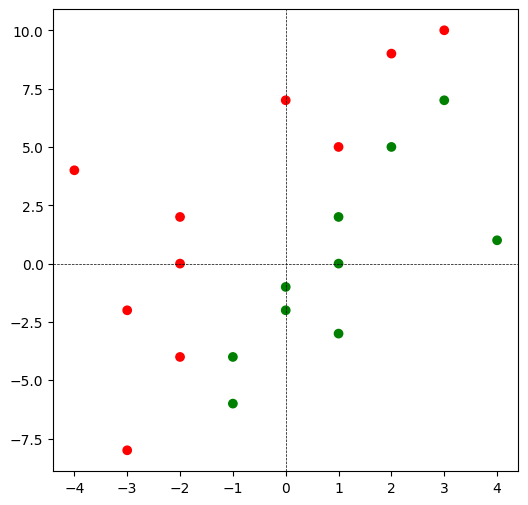

In [19]:
plt.scatter(X[0, :], X[1, :], c = y_color)
plt.axhline(color = 'black', linestyle = '--', linewidth = 0.5)
plt.axvline(color = 'black', linestyle = '--', linewidth = 0.5);

### Linear Separability

Is there another way to determine linear separability?

In [ ]:
correct = 0
i = 0
w = np.zeros(d)
epochs = 0
while correct != n:
    print(f'currently at data-point {i + 1}')
    # prediction
    y_hat = 1 if w.T @ X[:, i] >= 0 else -1
    # mistake or not
    if y[i] != y_hat:
        w += X[:, i] * y[i]
        correct = 0
    else:
        correct += 1
    i += 1
    # cycle back
    if i == n:
        i = 0
        epochs += 1
print(f'converges in {epochs} epochs')
w /= np.linalg.norm(w)
w

(-15.0, 15.0)

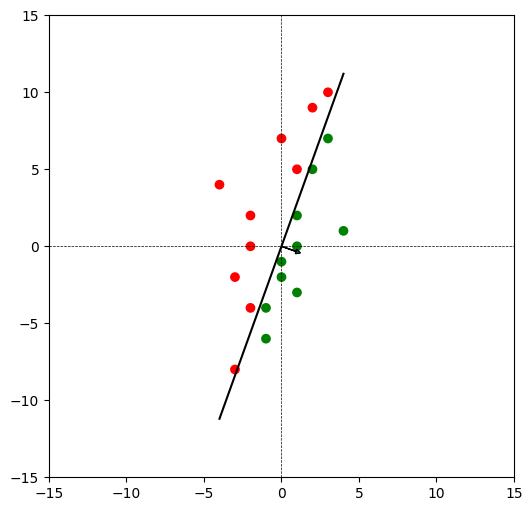

In [28]:
plt.scatter(X[0, :], X[1, :], c = y_color)
plt.axhline(color = 'black', linestyle = '--', linewidth = 0.5)
plt.axvline(color = 'black', linestyle = '--', linewidth = 0.5)
# Decision boundary
# w[0], w[1]
# w^Tx = 0
# w[0] * x + w[1] * y = 0
# y = -w[0] / w[1] * x
x_db = np.linspace(-4, 4)
y_db = -w[0] / w[1] * x_db
plt.plot(x_db, y_db, color = 'black')
plt.arrow(0, 0, w[0], w[1], head_width = 0.3, head_length = 0.3)
plt.xlim(-15, 15)
plt.ylim(-15, 15)

### Computing the Dual Objective

We shall follow a step-by-step approach to computing the dual objective function.

#### Step-1

Compute the object $\mathbf{Y}$ that appears in the dual problem.

In [31]:
Y = np.diag(y)
print(Y)

[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0

#### Step-2

Let $\boldsymbol{\alpha}$ be the dual variable. The dual objective is of the form:

$$
f(\boldsymbol{\alpha}) = \boldsymbol{\alpha}^T \mathbf{1} - \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha}
$$



Compute the matrix $\mathbf{Q}$ for this problem.

In [34]:
Q = Y.T @ X.T @ X @ Y

#### Step-3

Since `SciPy`'s optimization routines take the form of minimizing a function, we will recast $f$ as follows:

$$
f(\boldsymbol{\alpha}) =  \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

We now have to solve :

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad f(\boldsymbol{\alpha})
$$

Note that $\max$ changes to $\min$ since we changed the sign of the objective function.

In [60]:
def f(alpha):
    return 0.5 * alpha.T @ Q @ alpha - alpha.sum()

### Optimize

Finally, we have most of the ingredients to solve the dual problem:

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

Find the optimal value, $\boldsymbol{\alpha^{*}}$.

In [39]:
from scipy import optimize
alpha_init = np.zeros(n)
res = optimize.minimize(f, alpha_init, bounds = optimize.Bounds(0, np.inf))
res

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -4.99999999958859
        x: [ 0.000e+00  0.000e+00 ...  1.714e+00  1.629e+00]
      nit: 30
      jac: [ 5.000e+00  2.000e+00 ...  2.964e-04 -2.436e-04]
     nfev: 735
     njev: 35
 hess_inv: <20x20 LbfgsInvHessProduct with dtype=float64>

In [40]:
alpha_star = res.x
alpha_star

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.64285525, 1.65714065, 1.67142753, 1.68571355,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.71428422, 1.62856756])

### Support vectors

Find all the support vectors.

In [54]:
X_sup = X[:, alpha_star > 0]
y_sup = y[alpha_star > 0]
y_sup_color = np.where(y_sup == 1, 'green', 'red')
print(y_sup.shape[0])

6


### Optimal weight vector (Primal solution)

Find the optimal weight vector $\mathbf{w}^*$.

In [46]:
w_star = X @ Y @ alpha_star
w_star

array([ 2.99998762, -1.00002588])

### Decision Boundary

Plot the decision boundary along with the supporting hyperplanes. Note where the support vectors lie in this plot.

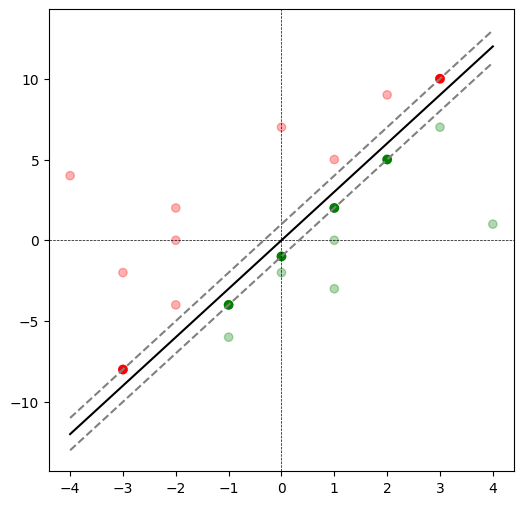

In [58]:
def plot_db(w):
    plt.scatter(X[0, :], X[1, :], c = y_color, alpha = 0.3)
    plt.scatter(X_sup[0, :], X_sup[1, :], c = y_sup_color)
    plt.axhline(color = 'black', linestyle = '--', linewidth = 0.5)
    plt.axvline(color = 'black', linestyle = '--', linewidth = 0.5)
    x_db = np.linspace(-4, 4)
    y_db = -w[0] / w[1] * x_db
    # decision boundary
    plt.plot(x_db, y_db, color = 'black')
    # supporting hyperplanes
    # w[0] * x + w[1] * y = +- 1
    # y = +-1 / w[1] - w[0] / w[1] * x
    y_sup_1 = 1 / w[1] - w[0] / w[1] * x_db
    y_sup_2 = -1 / w[1] - w[0] / w[1] * x_db
    plt.plot(x_db, y_sup_1, color = 'gray', linestyle = '--')
    plt.plot(x_db, y_sup_2, color = 'gray', linestyle = '--')
    #plt.arrow(0, 0, w[0], w[1], head_width = 0.3, head_length = 0.3)
    #plt.xlim(-10, 10)
    #plt.ylim(-10, 10)
plot_db(w_star)

## Soft-margin SVM

We now turn to soft-margin SVMs. Adapt the hard-margin code that you have written for the soft-margin problem. The only change you have to make is to introduce an upper bound for $\boldsymbol{\alpha}$, which is the hyperparameter $C$.


In [64]:
#### DATA: DO NOT EDIT THIS CELL ####
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8],
             [0, 0], [2, 7]]).T
y = np.array([1, 1, 1, 1, 1,
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1,
             -1, -1, -1, -1, -1,
              1, 1])

In [72]:
d, n = X.shape
d, n

(2, 22)

### Relationship between $C$ and margin

Plot the decision boundary and the supporting hyperplane for the following values of $C$.

(1) $C = 0.01$

(2) $C = 0.1$

(3) $C = 1$

(4) $C = 10$

Plot all of them in a $2 \times 2$ subplot. Study the tradeoff between the following quantities:

(1) Width of the margin.

(2) Number of points that lie within the margin or on the wrong side. This is often called **margin violation**.


In [63]:
# example of a lambda function
f = lambda x: x ** 2
f(10)

100

In [77]:
plt.rcParams['figure.figsize'] = [8, 8]

In [73]:
def train(C):
    # Shape
    d, n = X.shape
    # Step-1
    Y = np.diag(y)
    # Step-2
    Q = Y.T @ X.T @ X @ Y
    # Step-3
    f = lambda alpha: 0.5 * alpha.T @ Q @ alpha - alpha.sum()
    # Optimize
    alpha_init = np.zeros(n)
    res = optimize.minimize(f, alpha_init, bounds = optimize.Bounds(0, C))
    alpha_star = res.x
    # Weight vector
    w_star = X @ Y @ alpha_star
    # Support vectors
    X_sup = X[:, alpha_star > 0]
    y_sup = y[alpha_star > 0]
    y_sup_color = np.where(y_sup == 1, 'green', 'red')
    return alpha_star, w_star, X_sup, y_sup, y_sup_color

In [75]:
def plot_db(w):
    # Scatter plot for the dataset
    y_color = np.where(y == 1, 'green', 'red')
    plt.scatter(X[0, :], X[1, :], c = y_color, alpha = 0.3)
    plt.scatter(X_sup[0, :], X_sup[1, :], c = y_sup_color)
    plt.axhline(color = 'black', linestyle = '--', linewidth = 0.5)
    plt.axvline(color = 'black', linestyle = '--', linewidth = 0.5)
    # decision boundary
    x_db = np.linspace(-4, 4)
    # w[0] * x + w[1] * y = 0
    y_db = -w[0] / w[1] * x_db
    plt.plot(x_db, y_db, color = 'black')
    # supporting hyperplanes
    # w[0] * x + w[1] * y = +- 1
    # y = +-1 / w[1] - w[0] / w[1] * x
    y_sup_1 = 1 / w[1] - w[0] / w[1] * x_db
    y_sup_2 = -1 / w[1] - w[0] / w[1] * x_db
    plt.plot(x_db, y_sup_1, color = 'gray', linestyle = '--')
    plt.plot(x_db, y_sup_2, color = 'gray', linestyle = '--')
    plt.title(f'C = {C}')
    #plt.arrow(0, 0, w[0], w[1], head_width = 0.3, head_length = 0.3)
    #plt.xlim(-10, 10)
    #plt.ylim(-10, 10)

C = 0.01, 			 margin = 4.503773491110451
C = 0.1, 			 margin = 1.4680505641971735
C = 1, 			 margin = 0.582426201556298
C = 10, 			 margin = 0.31623043654354677


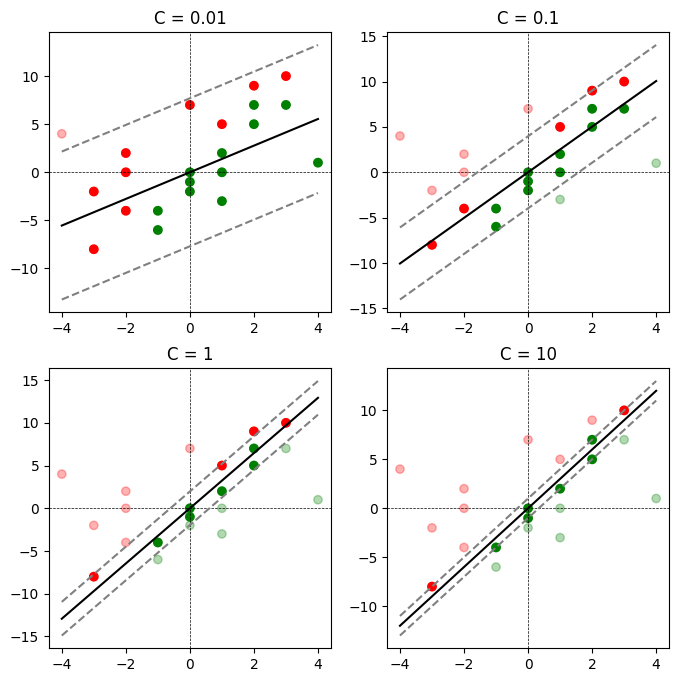

In [85]:
count = 1
for C in [0.01, 0.1, 1, 10]:
    alpha_star, w_star, X_sup, y_sup, y_sup_color = train(C)
    print(f'C = {C}, \t\t\t margin = {1 / np.linalg.norm(w_star)}')
    plt.subplot(2, 2, count)
    plot_db(w_star)
    count += 1

### Support vectors

For $C = 10$, study the number of support vectors that the model has.